# 1. Introduction
This mini-project is to build a predictive model for predicting whether a customer will make a call for payment and the business team can help them transit to make online payments.

# 2. Required Packages
In order to run the scripts, the following packages must be installed on python 3:

Packages:

* Python 3.5
* numpy
* pandas 0.18
* matplotlib
* time
* scikit-learn 0.18
* scipy

# 3. Input Data
* ./DS_MiniProject_ANON.csv <br>

The data has 130,086 rows wit 29 features.

# 4. Results

# 5. Things to do
Ideas with the date column: maybe it's too cold and internet interupt prone, call first etc. Create new feature to get month of year.

In [147]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pylab
from matplotlib.pylab import rcParams
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')
pylab.rcParams['figure.figsize'] = (10, 6)
pd.options.display.max_columns = None

In [2]:
def dateparse(s):
    try:
        return pd.datetime.strptime(s,'%m/%d/%Y')
    except TypeError:
        return pd.NaT

In [3]:
raw = pd.read_csv('./DS_MiniProject_ANON.csv',parse_dates=['DATE_FOR'], date_parser=dateparse)
print("The shape of the data is %s"%str(raw.shape))
raw.head().T  # Transpose for a better view of the data

The shape of the data is (130086, 29)


,0,1,2,3,4
DATE_FOR,2014-05-19 00:00:00,2014-05-17 00:00:00,2014-05-15 00:00:00,2014-05-16 00:00:00,2014-05-20 00:00:00
RTD_ST_CD,ST_S0,ST_S0,ST_S0,ST_S1,ST_S0
CustomerSegment,1,1,1,1,1
Tenure,16.1752,15.9316,15.937,15.9343,15.5017
Age,78.4038,70.9897,87.5784,68.4381,80.5147
MART_STATUS,MS_S0,MS_S1,MS_S2,MS_S2,MS_S0
GENDER,F,F,M,M,F
CHANNEL1_6M,0,0,0,0,0
CHANNEL2_6M,0,6,0,0,0
CHANNEL3_6M,1,0,10,1,1


In [4]:
raw.describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,130086.0,8.583048,7.297112,0.032854,3.249829,7.006160,11.610540,63.091034
Age,130086.0,48.842201,14.038089,16.689938,37.878166,49.147159,58.858316,99.348392
CHANNEL1_6M,129277.0,0.261810,1.092346,0.000000,0.000000,0.000000,0.000000,12.000000
CHANNEL2_6M,129277.0,0.948467,1.880123,0.000000,0.000000,0.000000,1.000000,53.000000
CHANNEL3_6M,129277.0,0.811652,1.824188,0.000000,0.000000,0.000000,0.000000,26.000000
CHANNEL4_6M,129277.0,0.401216,1.065413,0.000000,0.000000,0.000000,0.000000,18.000000
CHANNEL5_6M,129277.0,0.569823,1.628655,0.000000,0.000000,0.000000,0.000000,29.000000
METHOD1_6M,129277.0,1.834425,2.596754,0.000000,0.000000,0.000000,4.000000,53.000000
RECENT_PAYMENT,129277.0,0.105680,0.307429,0.000000,0.000000,0.000000,0.000000,1.000000
PAYMENTS_6M,129277.0,4.848333,2.027548,1.000000,4.000000,6.000000,6.000000,53.000000


# Data Prepration
Including but beyond:
* Inventory check (data types, categorical features, numerical features, text features)
* Mising data mark and visualization
* Missing data preprocessing (inputation or removal)
* Data type conversion (to categorical or not)

## Check data type and keep an inventory of numerical, date, text, categorical

In [5]:
raw.dtypes

DATE_FOR                 datetime64[ns]
RTD_ST_CD                        object
CustomerSegment                  object
Tenure                          float64
Age                             float64
MART_STATUS                      object
GENDER                           object
CHANNEL1_6M                     float64
CHANNEL2_6M                     float64
CHANNEL3_6M                     float64
CHANNEL4_6M                     float64
CHANNEL5_6M                     float64
METHOD1_6M                      float64
RECENT_PAYMENT                  float64
PAYMENTS_6M                     float64
CHANNEL1_3M                       int64
CHANNEL2_3M                       int64
CHANNEL3_3M                       int64
CHANNEL4_3M                       int64
CHANNEL5_3M                       int64
METHOD1_3M                        int64
PAYMENTS_3M                       int64
NOT_DI_3M                         int64
NOT_DI_6M                         int64
EVENT1_30_FLAG                    int64


In [6]:
dtypes = raw.dtypes
objColumns = [key for key in dict(dtypes) if dict(dtypes)[key] in ['object']]
intColumns = [key for key in dict(dtypes) if dict(dtypes)[key] in ['int64']]
# remove 'Call Flag' from the feature column dictionary
intColumns.remove('Call_Flag')
floatColumns = [key for key in dict(dtypes) if dict(dtypes)[key] in ['float64']]

In [7]:
columnDict = {'objColumns': objColumns,
             'intColumns': intColumns,
             'floatColumns': floatColumns,
             'DateColumn':['DATE_FOR'],
              'targetColumn':['Call_Flag']
             }

In [8]:
columnDict

{'DateColumn': ['DATE_FOR'],
 'floatColumns': ['Tenure',
  'Age',
  'CHANNEL1_6M',
  'CHANNEL2_6M',
  'CHANNEL3_6M',
  'CHANNEL4_6M',
  'CHANNEL5_6M',
  'METHOD1_6M',
  'RECENT_PAYMENT',
  'PAYMENTS_6M'],
 'intColumns': ['CHANNEL1_3M',
  'CHANNEL2_3M',
  'CHANNEL3_3M',
  'CHANNEL4_3M',
  'CHANNEL5_3M',
  'METHOD1_3M',
  'PAYMENTS_3M',
  'NOT_DI_3M',
  'NOT_DI_6M',
  'EVENT1_30_FLAG',
  'EVENT2_90_SUM',
  'LOGINS',
  'POLICYPURCHASECHANNEL'],
 'objColumns': ['RTD_ST_CD', 'CustomerSegment', 'MART_STATUS', 'GENDER'],
 'targetColumn': ['Call_Flag']}

## Check missing data

In [9]:
# Drop duplicate before doing anything
raw_no_duplicate = raw.drop_duplicates()
print("There are %d row of duplicates in this data."%(raw.shape[0] - raw_no_duplicate.shape[0]))

There are 278 row of duplicates in this data.


In [10]:
#Check missing data
def check_missing(df):
    # dataframe for total count of missing for each column
    df_sum =pd.DataFrame(df.isnull().sum()).T
    # dataframe for any missing data for each column
    df_any =pd.DataFrame(df.isnull().any()).T 

    missing_stats_df = df_any.append(df_sum)
    missing_stats_df.index = ['Empty Exist','Count']

    for column in missing_stats_df.columns:
        if missing_stats_df[column][0] == True :
            print("There are missing value in column '%s': missing %d record, percentage %5.2f "%
                  (column,missing_stats_df.loc['Count',column],
                   missing_stats_df.loc['Count',column]/df.shape[0]))
    return missing_stats_df
missing_stats_df= check_missing(raw_no_duplicate)


There are missing value in column 'CHANNEL1_6M': missing 809 record, percentage  0.01 
There are missing value in column 'CHANNEL2_6M': missing 809 record, percentage  0.01 
There are missing value in column 'CHANNEL3_6M': missing 809 record, percentage  0.01 
There are missing value in column 'CHANNEL4_6M': missing 809 record, percentage  0.01 
There are missing value in column 'CHANNEL5_6M': missing 809 record, percentage  0.01 
There are missing value in column 'METHOD1_6M': missing 809 record, percentage  0.01 
There are missing value in column 'RECENT_PAYMENT': missing 809 record, percentage  0.01 
There are missing value in column 'PAYMENTS_6M': missing 809 record, percentage  0.01 


### As seen above, there are 1% data missing for 7 feature columns. Based on early data explorization, it seems a lot the columns have very small set of unique values. And there is no missing data for the target variable. Let's drop the missing data for now as it won't impact the results much. Next, let's look at the dispersion of the numerical features. Integer to float.

In [11]:
raw_no_duplicate_no_missing = raw_no_duplicate.dropna()
check_missing(raw_no_duplicate_no_missing)

,DATE_FOR,RTD_ST_CD,CustomerSegment,Tenure,Age,MART_STATUS,GENDER,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,...,CHANNEL5_3M,METHOD1_3M,PAYMENTS_3M,NOT_DI_3M,NOT_DI_6M,EVENT1_30_FLAG,EVENT2_90_SUM,LOGINS,POLICYPURCHASECHANNEL,Call_Flag
Empty Exist,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Count,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Check the uniqueness of the numerical features, particularly integer columns. There are multiple ways of doing it: 1. visualization (histogram) 2. value counts stats.
As seen below, all the interger columns can be treated as categorical features since there are very small amount of labels with maximum of 45 values. Based on initial data check with raw.head(), I can see that the object features have at least more than 1 value. I'll skip the programming way of check. 

In [12]:
# I'll go with simple one first, value counts
columnWithConstant = []
for col in columnDict['intColumns']:
    cnts = pd.DataFrame(raw_no_duplicate_no_missing[col].value_counts())
    if(len(cnts.index)) == 1:
        columnWithConstant.append(col)
    display(cnts.T)
print("Column with constant values (to be removed) is %s"%str(columnWithConstant))

,0,3,1,2,4,5,6
CHANNEL1_3M,122884,2136,1773,1688,400,88,30


,0,3,1,2,4,5,6,7,36,11,8
CHANNEL2_3M,100663,12381,8680,6747,461,44,16,4,1,1,1


,0,3,1,2,4,5,6,7,16
CHANNEL3_3M,106508,12390,5349,4445,265,23,15,3,1


,0,1,2,3,4,5,6,7,8,10
CHANNEL4_3M,112851,10096,3371,2264,297,68,40,6,5,1


,0,3,1,2,4,5,6,7,8,13,11,10,9,16,14,12
CHANNEL5_3M,114048,8679,3074,2720,366,42,37,12,7,3,3,3,2,1,1,1


,0,3,1,2,4,5,6,7,8,9,10,12,11,36,14,13
METHOD1_3M,82397,22908,10355,8518,3506,746,347,149,41,17,6,3,3,1,1,1


,3,2,1,0,4,5,6,7,8,9,10,12,13,11,16,21,14,17,18,36
PAYMENTS_3M,72773,17327,17115,12244,7000,1416,693,254,87,46,13,9,8,6,3,1,1,1,1,1


,0,1
NOT_DI_3M,121777,7222


,0,1
NOT_DI_6M,118617,10382


,0
EVENT1_30_FLAG,128999


,0,1,2,3,4
EVENT2_90_SUM,110272,12896,5432,387,12


,0,1,2,3,4,5,6,7,8,9,...,41,42,43,45,37,35,34,38,36,40
LOGINS,75367,27242,13111,5939,2956,1473,805,491,300,161,...,5,5,4,4,3,3,3,2,2,1


,0,1
POLICYPURCHASECHANNEL,112066,16933


Column with constant values (to be removed) is ['EVENT1_30_FLAG']


## Check float columns to see whether we can convert it to categorical features.
As seen below, the only two columns that definitely shouldn't be converted are : 'Tenure' and 'Age'. Payment feature column is alread binary

In [13]:
# Check the float columns
for col in columnDict['floatColumns']:
    cnts = pd.DataFrame(raw_no_duplicate_no_missing[col].value_counts())
    if(len(cnts.index)) == 1:
        columnWithConstant.append(col)
    display(cnts.T)
print("Column with constant values (to be removed) is %s"%str(columnWithConstant))

,0.50924,0.501027,0.511978,0.514716,0.517454,1.007529,0.520192,1.010267,1.01848,1.015743,...,34.08898,23.879535,24.145106,33.765914,20.281999,24.799452,25.034908,41.508556,24.290212,38.255989
Tenure,309,259,251,249,244,244,238,235,230,223,...,1,1,1,1,1,1,1,1,1,1


,48.654346,55.638604,56.681725,58.045175,52.703628,39.687885,50.004107,41.409993,52.402464,53.352498,...,79.832991,20.271047,76.320329,77.505818,72.747433,90.061602,77.713895,82.499658,79.531828,21.604381
Age,21,21,21,20,20,20,20,19,19,19,...,1,1,1,1,1,1,1,1,1,1


,0.0,1.0,2.0,6.0,5.0,3.0,4.0,7.0,8.0,9.0,10.0,11.0,12.0
CHANNEL1_6M,119839,1656,1618,1508,1281,1261,1219,358,141,70,33,10,5


,0.0,1.0,6.0,4.0,5.0,2.0,3.0,7.0,8.0,11.0,9.0,10.0,12.0,53.0,13.0,17.0,23.0
CHANNEL2_6M,94616,8183,7711,5176,4774,4155,3980,312,46,12,12,12,6,1,1,1,1


,0.0,6.0,1.0,5.0,4.0,3.0,2.0,7.0,8.0,9.0,10.0,12.0,11.0,26.0
CHANNEL3_6M,102624,8335,4866,3957,3751,2703,2490,215,23,16,9,7,2,1


,0.0,1.0,2.0,3.0,4.0,6.0,5.0,7.0,8.0,9.0,10.0,12.0,11.0,14.0,13.0,18.0,17.0,15.0
CHANNEL4_6M,103046,14674,5244,2252,1376,1125,943,170,82,32,20,18,6,4,4,1,1,1


,0.0,6.0,5.0,4.0,1.0,3.0,2.0,7.0,8.0,12.0,...,14.0,23.0,18.0,24.0,17.0,26.0,25.0,29.0,16.0,15.0
CHANNEL5_6M,111842,5891,2667,2558,2477,1601,1438,364,57,27,...,6,3,2,2,2,2,1,1,1,1


,0.0,6.0,1.0,5.0,4.0,2.0,3.0,7.0,8.0,9.0,...,15.0,17.0,16.0,18.0,21.0,24.0,19.0,23.0,20.0,53.0
METHOD1_6M,72093,15794,11986,7258,5953,5868,4641,3063,1055,496,...,16,14,11,4,3,2,2,1,1,1


,0.0,1.0
RECENT_PAYMENT,115355,13644


,6.0,5.0,4.0,1.0,3.0,2.0,7.0,8.0,9.0,10.0,...,23.0,19.0,21.0,22.0,24.0,20.0,29.0,27.0,53.0,33.0
PAYMENTS_6M,54306,18119,16787,13184,8075,7429,6654,1971,918,537,...,5,4,4,4,4,3,2,1,1,1


Column with constant values (to be removed) is ['EVENT1_30_FLAG']


### Check the distribution of the columns with big vairations, ' age' and 'tenure'
The 'age' feature looks more like normal distributed and 'Tenure' is not. I'll do a transformation of the data, log and sqrt. It looks like using np.sqrt() can transform the data better. 

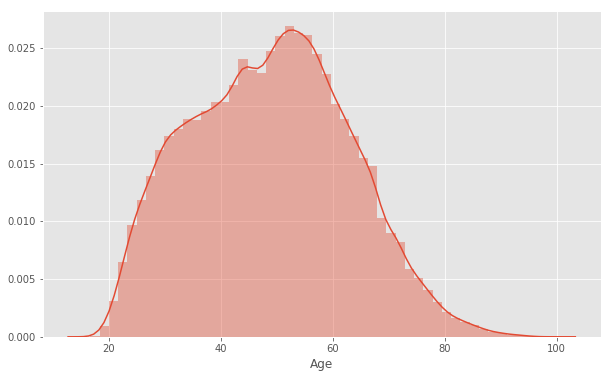

In [14]:
sns.distplot(raw_no_duplicate_no_missing.Age)

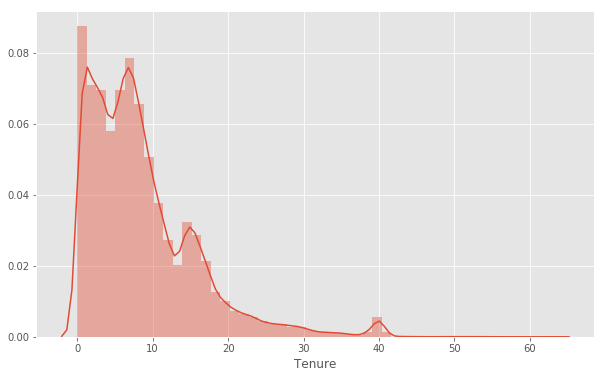

In [15]:
sns.distplot(raw_no_duplicate_no_missing.Tenure)

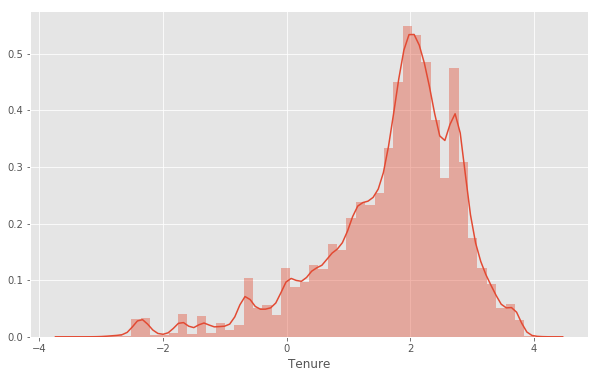

In [16]:
# look at the log transformation of 'Tenure' feature
sns.distplot(np.log(raw_no_duplicate_no_missing.Tenure))

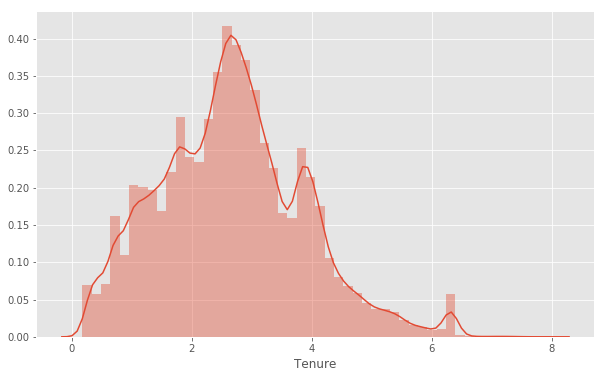

In [17]:
sns.distplot(np.sqrt(raw_no_duplicate_no_missing.Tenure))

In [18]:
raw_no_duplicate_no_missing['Tenure'] = np.sqrt(raw_no_duplicate_no_missing['Tenure']).tolist()

/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Distribution of the target and feture columns. 
* First of all, check whether the target is balanced. 
* Secondly, check the distribution of the feature columns and see whether we need to do any feature transformation to make is quasi-uniform distributed to satisfy some Machine Learning algorithms.

In [20]:
raw_no_duplicate_no_missing.columns

Index(['DATE_FOR', 'RTD_ST_CD', 'CustomerSegment', 'Tenure', 'Age',
       'MART_STATUS', 'GENDER', 'CHANNEL1_6M', 'CHANNEL2_6M', 'CHANNEL3_6M',
       'CHANNEL4_6M', 'CHANNEL5_6M', 'METHOD1_6M', 'RECENT_PAYMENT',
       'PAYMENTS_6M', 'CHANNEL1_3M', 'CHANNEL2_3M', 'CHANNEL3_3M',
       'CHANNEL4_3M', 'CHANNEL5_3M', 'METHOD1_3M', 'PAYMENTS_3M', 'NOT_DI_3M',
       'NOT_DI_6M', 'EVENT1_30_FLAG', 'EVENT2_90_SUM', 'LOGINS',
       'POLICYPURCHASECHANNEL', 'Call_Flag'],
      dtype='object')

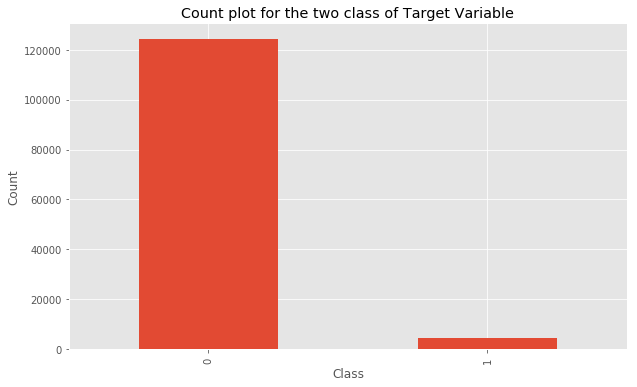

In [21]:
# distribution of target variable (call_flag)
ax = raw_no_duplicate_no_missing['Call_Flag'].value_counts().plot(kind='bar')
ax.set_title("Count plot for the two class of Target Variable")
ax.set_xlabel("Class")
ax.set_ylabel("Count")

In [22]:
# Check distribution of feature variables, possible feature engineering
# 1. shorten labels for the features that will be converted to categorical
# 2. collinearity of all the numerical features besides the removed features (constant column)
# 3. visualization of the pair covariance

In [23]:
# Remove the constant features
raw_no_duplicate_no_constant_col = raw_no_duplicate_no_missing.drop(columnWithConstant, axis = 1)

In [24]:
raw_no_duplicate_no_constant_col.dtypes

DATE_FOR                 datetime64[ns]
RTD_ST_CD                        object
CustomerSegment                  object
Tenure                          float64
Age                             float64
MART_STATUS                      object
GENDER                           object
CHANNEL1_6M                     float64
CHANNEL2_6M                     float64
CHANNEL3_6M                     float64
CHANNEL4_6M                     float64
CHANNEL5_6M                     float64
METHOD1_6M                      float64
RECENT_PAYMENT                  float64
PAYMENTS_6M                     float64
CHANNEL1_3M                       int64
CHANNEL2_3M                       int64
CHANNEL3_3M                       int64
CHANNEL4_3M                       int64
CHANNEL5_3M                       int64
METHOD1_3M                        int64
PAYMENTS_3M                       int64
NOT_DI_3M                         int64
NOT_DI_6M                         int64
EVENT2_90_SUM                     int64


In [25]:
columnDict = {'objColumns': objColumns,
             'intColumns': intColumns,
             'floatColumns': floatColumns,
             'DateColumn':['DATE_FOR'],
              'targetColumn':['Call_Flag']
             }


In [26]:
# update the intColumns after remove the 'EVENT1_30_FLAG'
intColumns.remove('EVENT1_30_FLAG')
columnDict['intColumns'] = intColumns

In [27]:
feature_col = columnDict['objColumns'] + columnDict['intColumns'] + columnDict['floatColumns']
numericalColumns = columnDict['intColumns'] + columnDict['floatColumns']

In [30]:
pd_corr = raw_no_duplicate_no_constant_col[feature_col].corr()  # tried a seaborn visualization but dont' creat much more value here
pd_corr

,CHANNEL1_3M,CHANNEL2_3M,CHANNEL3_3M,CHANNEL4_3M,CHANNEL5_3M,METHOD1_3M,PAYMENTS_3M,NOT_DI_3M,NOT_DI_6M,EVENT2_90_SUM,...,Tenure,Age,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,CHANNEL4_6M,CHANNEL5_6M,METHOD1_6M,RECENT_PAYMENT,PAYMENTS_6M
CHANNEL1_3M,1.000000,-0.069783,-0.080803,0.036834,-0.062006,0.326613,0.258982,0.826757,0.682619,0.040800,...,-0.184535,-0.140043,0.904531,-0.079022,-0.086545,0.027877,-0.066348,0.296008,0.035465,0.230029
CHANNEL2_3M,-0.069783,1.000000,-0.178053,0.005937,-0.150352,0.176098,0.204231,-0.081690,-0.083542,0.059857,...,0.074081,0.068119,-0.073527,0.949120,-0.176670,0.051806,-0.153909,0.154283,0.068655,0.182332
CHANNEL3_3M,-0.080803,-0.178053,1.000000,-0.110734,-0.138143,-0.261651,0.139703,-0.093760,-0.105128,-0.078037,...,0.132517,0.251971,-0.090088,-0.183603,0.964885,-0.118379,-0.143120,-0.273708,-0.034247,0.105841
CHANNEL4_3M,0.036834,0.005937,-0.110734,1.000000,-0.096606,0.228913,0.177260,0.073829,0.101574,0.197468,...,-0.085204,0.001973,0.060746,0.029201,-0.107620,0.876866,-0.098399,0.193873,0.086792,0.129744
CHANNEL5_3M,-0.062006,-0.150352,-0.138143,-0.096606,1.000000,-0.202982,0.152408,-0.072015,-0.079412,-0.051861,...,0.114386,0.030978,-0.068643,-0.154956,-0.141138,-0.106472,0.965931,-0.210217,-0.017204,0.139699
METHOD1_3M,0.326613,0.176098,-0.261651,0.228913,-0.202982,1.000000,0.420494,0.282058,0.288385,0.173141,...,-0.251286,-0.271110,0.332481,0.148684,-0.268024,0.212778,-0.208125,0.943003,0.122333,0.373620
PAYMENTS_3M,0.258982,0.204231,0.139703,0.177260,0.152408,0.420494,1.000000,0.199936,0.176030,0.187238,...,0.015789,-0.078836,0.243917,0.151468,0.098614,0.127102,0.112883,0.331128,0.206441,0.861563
NOT_DI_3M,0.826757,-0.081690,-0.093760,0.073829,-0.072015,0.282058,0.199936,1.000000,0.823150,0.071904,...,-0.233797,-0.167015,0.803772,-0.093298,-0.101512,0.050862,-0.077498,0.258249,0.052097,0.159377
NOT_DI_6M,0.682619,-0.083542,-0.105128,0.101574,-0.079412,0.288385,0.176030,0.823150,1.000000,0.141572,...,-0.271119,-0.198782,0.808248,-0.099826,-0.115900,0.079348,-0.087992,0.307010,0.048360,0.190297
EVENT2_90_SUM,0.040800,0.059857,-0.078037,0.197468,-0.051861,0.173141,0.187238,0.071904,0.141572,1.000000,...,-0.058386,-0.086072,0.094772,0.040995,-0.088067,0.185526,-0.060390,0.162486,0.194195,0.156991


### As seen from the correlation for the numerical features, it seems CHANNEL[n]_1M is highly correlated to CHANNEL[n]_6M and method1_3m correlated to method1_6m.

In [31]:
# find the index (i,j) with correlation > a threshold (0.9)
coef_threshold = 0.9
corr_array = np.asarray(pd_corr)
[i_index, j_index] = np.where(np.abs(corr_array) > coef_threshold)


In [32]:
# remove the (i,i) pairs
index2keep = []
for ii in range(0,len(i_index)):
    if(i_index[ii] != j_index[ii]):
        index2keep.append(ii)
iList = i_index[index2keep]
jList = j_index[index2keep]
print(iList)
print(jList)
features2remove = pd_corr.columns.values[[0,1,2,4,5]].tolist()

[ 0  1  2  4  5 14 15 16 18 19]
[14 15 16 18 19  0  1  2  4  5]


In [33]:
features2remove

['CHANNEL1_3M', 'CHANNEL2_3M', 'CHANNEL3_3M', 'CHANNEL5_3M', 'METHOD1_3M']

In [34]:
features2use = [col for col in feature_col if col not in features2remove]
print(features2use)

['RTD_ST_CD', 'CustomerSegment', 'MART_STATUS', 'GENDER', 'CHANNEL4_3M', 'PAYMENTS_3M', 'NOT_DI_3M', 'NOT_DI_6M', 'EVENT2_90_SUM', 'LOGINS', 'POLICYPURCHASECHANNEL', 'Tenure', 'Age', 'CHANNEL1_6M', 'CHANNEL2_6M', 'CHANNEL3_6M', 'CHANNEL4_6M', 'CHANNEL5_6M', 'METHOD1_6M', 'RECENT_PAYMENT', 'PAYMENTS_6M']


In [102]:
data2use = data_no_dup_no_cnst_no_missing[features2use]
data2use.head()

,RTD_ST_CD,CustomerSegment,MART_STATUS,GENDER,CHANNEL4_3M,PAYMENTS_3M,NOT_DI_3M,NOT_DI_6M,EVENT2_90_SUM,LOGINS,...,Tenure,Age,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,CHANNEL4_6M,CHANNEL5_6M,METHOD1_6M,RECENT_PAYMENT,PAYMENTS_6M
0,ST_S0,1,MS_S0,F,0,3,0,0,0,0,...,4.021843,78.403833,0.0,0.0,1.0,0.0,5.0,0.0,0.0,6.0
1,ST_S0,1,MS_S1,F,0,3,0,0,0,0,...,3.991435,70.989733,0.0,6.0,0.0,0.0,0.0,6.0,0.0,6.0
2,ST_S0,1,MS_S2,M,0,6,0,0,0,0,...,3.992121,87.578371,0.0,0.0,10.0,0.0,0.0,0.0,0.0,10.0
3,ST_S1,1,MS_S2,M,0,0,0,0,0,0,...,3.991778,68.438056,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,ST_S0,1,MS_S0,F,0,1,0,0,0,0,...,3.937221,80.514716,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


#### Based on previous data uniqueness and variation analysis, the two columns that will not be converted to categorical features are ['age','Tenure']

### Converting features to categorical features
Feature like 'RTD_ST_CD' has more than 50 unique values, directly using one hot encoding will give too much new columns. Later, I'll explore ways to shorten it based on some data pattern.

In [103]:
# convert features to categorical features
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
catColumns = ['CustomerSegment','MART_STATUS','GENDER','RECENT_PAYMENT'] #,'RTD_ST_CD']
for col in catColumns:
    n = len(data2use[col].unique())
    if (n > 2):
        X = pd.get_dummies(data2use[col], prefix = col, drop_first=True)
      #  X = X.drop(X.columns[0], axis=1)
        data2use[X.columns] = X;
        data2use.drop(col, axis=1, inplace=True) # drop the original categorical variable (optional)

    else:
        le.fit(data2use[col])
        data2use[col] = le.transform(data2use[col])
data2use.dtypes

/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set

RTD_ST_CD                 object
GENDER                     int64
CHANNEL4_3M                int64
PAYMENTS_3M                int64
NOT_DI_3M                  int64
NOT_DI_6M                  int64
EVENT2_90_SUM              int64
LOGINS                     int64
POLICYPURCHASECHANNEL      int64
Tenure                   float64
Age                      float64
CHANNEL1_6M              float64
CHANNEL2_6M              float64
CHANNEL3_6M              float64
CHANNEL4_6M              float64
CHANNEL5_6M              float64
METHOD1_6M               float64
RECENT_PAYMENT             int64
PAYMENTS_6M              float64
CustomerSegment_2          uint8
CustomerSegment_3          uint8
CustomerSegment_NONE       uint8
MART_STATUS_MS_S1          uint8
MART_STATUS_MS_S2          uint8
MART_STATUS_MS_S3          uint8
MART_STATUS_MS_S4          uint8
dtype: object

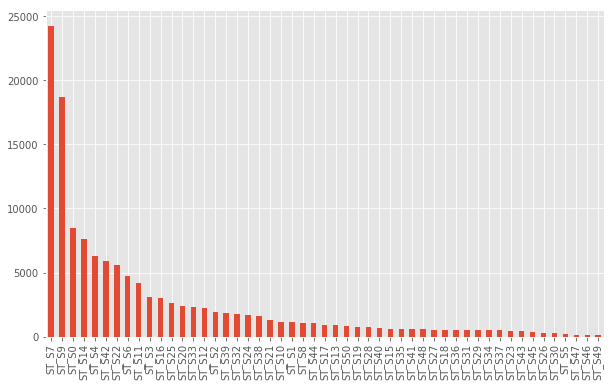

In [143]:
data2use['RTD_ST_CD'].value_counts().plot(kind='bar')

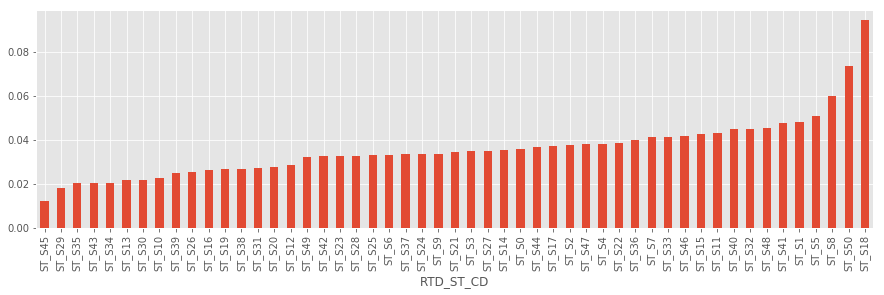

In [144]:
data = pd.concat([data2use,raw_no_duplicate_no_constant_col['Call_Flag']], axis = 1)
data.groupby("RTD_ST_CD")["Call_Flag"].mean().sort_values().plot(kind="bar", figsize=(15,4))

In [145]:
# bin the 'RTD_ST_CD' data
data = data.join(pd.cut(data.groupby(
            "RTD_ST_CD")["Call_Flag"].mean().sort_values(), 4, labels=[
            "0","1","2","3"]), on="RTD_ST_CD", rsuffix="_ST")
data.drop(["RTD_ST_CD"], axis=1, inplace=True)

In [146]:
data.to_csv('data2use.csv', index = False)

# Modeling

In [159]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifierCV, LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from scipy.stats import multivariate_normal
from sklearn.metrics import roc_auc_score, make_scorer, confusion_matrix, classification_report, f1_score
score = make_scorer(roc_auc_score)

In [104]:
# Define helper functions

def normalize(X):
    """
    Make the distribution of the values of each variable similar 
    by subtracting the mean and by dividing by the standard deviation.
    """
    for feature in X.columns:
        X[feature] -= X[feature].mean()
        X[feature] /= X[feature].std()
    return X

def train_predict(model, X_train, y_train, X_test, y_test):
    print("Training a %s classifier using a training set size of %d"%(model.__class__.__name__, len(X_train)))
    model.fit(X_train, y_train)
    print("The AUC score for training set is %.4f"%(predict_labels(model, X_train, y_train)))
    print("The AUC score for test set is %.4f"%(predict_labels(model, X_test, y_test)))
    
def predict_labels(model, features, target):
    y_pred = model.predict(features)
    return roc_auc_score(target, y_pred)


In [107]:
# Get data ready
X = data2use.drop('RTD_ST_CD', axis = 1)
y = raw_no_duplicate_no_constant_col['Call_Flag']

## Base logistic regression with upsampling and downsampling
There are many sampling methods that can be used, here I'll try simple sampling techinques from sklearn.utils. Other advanced methods like SMOTE and other things can also be tested when have more time.

#### Upsampling using resample utility

In [162]:
# Resampling method
from sklearn.utils import resample
# Separate majority and minority classes
#data = pd.concat([X,y], axis = 1)
df_majority = data[data['Call_Flag'] == 0]
df_minority = data[data['Call_Flag'] == 1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=128) # reproducible results
#
    
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled['Call_Flag'].value_counts()

1    124313
0    124313
Name: Call_Flag, dtype: int64

In [163]:
# Define the model
X_upsampled = df_upsampled[X.columns]
y_upsampled = df_upsampled['Call_Flag']
model_base = LogisticRegression()

# Define the splitter for splitting the data in a train set and a test set
splitter = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=0)

# Loop through the splits (only one)
for train_indices, test_indices in splitter.split(X_upsampled, y_upsampled):
    # Select the train and test data
    X_train, y_train = X_upsampled.iloc[train_indices], y_upsampled.iloc[train_indices]
    X_test, y_test = X_upsampled.iloc[test_indices], y_upsampled.iloc[test_indices]
    
    # Normalize the data
  #  X_train = normalize(X_train)
  #  X_test = normalize(X_test)
    
    # Fit and predict!
    model_base.fit(X_train, y_train)
    y_pred = model_base.predict(X_test)
    
    # And finally: show the results
    print(classification_report(y_test, y_pred))


             precision    recall  f1-score   support

          0       0.79      0.74      0.77     37294
          1       0.76      0.80      0.78     37294

avg / total       0.77      0.77      0.77     74588

             precision    recall  f1-score   support

          0       0.79      0.75      0.77     37294
          1       0.76      0.80      0.78     37294

avg / total       0.78      0.78      0.78     74588

             precision    recall  f1-score   support

          0       0.79      0.75      0.77     37294
          1       0.76      0.80      0.78     37294

avg / total       0.77      0.77      0.77     74588



#### Downsampling using resample utility

In [164]:
# Try downsampling for majority class
# Resampling method
from sklearn.utils import resample
# Separate majority and minority classes
data = pd.concat([X,y], axis = 1)
df_majority = data[data['Call_Flag'] == 0]
df_minority = data[data['Call_Flag'] == 1]

df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority),     # to match minority class
                                 random_state=123) # reproducible results 
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled['Call_Flag'].value_counts()



1    4686
0    4686
Name: Call_Flag, dtype: int64

In [165]:

# Define the model
X_downsampled = df_downsampled[X.columns]
y_downsampled = df_downsampled['Call_Flag']
model_base = LogisticRegression()

# Define the splitter for splitting the data in a train set and a test set
splitter = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=0)

# Loop through the splits (only one)
for train_indices, test_indices in splitter.split(X_downsampled, y_downsampled):
    # Select the train and test data
    X_train, y_train = X_downsampled.iloc[train_indices], y_downsampled.iloc[train_indices]
    X_test, y_test = X_downsampled.iloc[test_indices], y_downsampled.iloc[test_indices]
    
    # Normalize the data
  #  X_train = normalize(X_train)
  #  X_test = normalize(X_test)
    
    # Fit and predict!
    model_base.fit(X_train, y_train)
    y_pred = model_base.predict(X_test)
    
    # And finally: show the results
    print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.79      0.75      0.77      1406
          1       0.76      0.80      0.78      1406

avg / total       0.77      0.77      0.77      2812

             precision    recall  f1-score   support

          0       0.78      0.76      0.77      1406
          1       0.77      0.78      0.78      1406

avg / total       0.77      0.77      0.77      2812

             precision    recall  f1-score   support

          0       0.79      0.77      0.78      1406
          1       0.78      0.80      0.79      1406

avg / total       0.79      0.79      0.79      2812



## Logistic Regression Cross Validation Classifier

In [222]:
seed = 128
searchCV = LogisticRegressionCV(Cs = [0.001,0.01,0.1,1,10,100], cv=4, scoring=score, penalty='l2', solver = 'lbfgs', random_state=seed, class_weight='balanced')
searchCV.fit(X_train, y_train)
print("Model has a training AUC score of %.4f"%(predict_labels(searchCV, X_train, y_train)))
print('Model has a testing AUC score of %.4f'%(predict_labels(searchCV, X_test, y_test)))

Model has a training AUC score of 0.7747
Model has a testing AUC score of 0.7737


1. feature RECENT_PAYMENT (-0.897259)
2. feature CHANNEL4_6M (0.889336)
3. feature NOT_DI_3M (0.853672)
4. feature CustomerSegment_NONE (-0.661454)
5. feature POLICYPURCHASECHANNEL (-0.603614)
6. feature PAYMENTS_6M (-0.439235)
7. feature CHANNEL1_6M (0.395811)
8. feature CHANNEL2_6M (0.352599)
9. feature NOT_DI_6M (-0.233989)
10. feature MART_STATUS_MS_S3 (-0.194132)
11. feature Tenure (-0.188178)
12. feature MART_STATUS_MS_S2 (-0.182616)
13. feature MART_STATUS_MS_S1 (-0.181088)
14. feature PAYMENTS_3M (-0.147143)
15. feature CHANNEL4_3M (0.117462)
16. feature CHANNEL5_6M (-0.112179)
17. feature CustomerSegment_3 (-0.111646)
18. feature CHANNEL3_6M (0.087183)
19. feature EVENT2_90_SUM (-0.076319)
20. feature LOGINS (-0.047384)
21. feature CustomerSegment_2 (0.042496)
22. feature GENDER (0.038888)
23. feature MART_STATUS_MS_S4 (-0.015700)
24. feature METHOD1_6M (0.009848)
25. feature Age (0.004981)


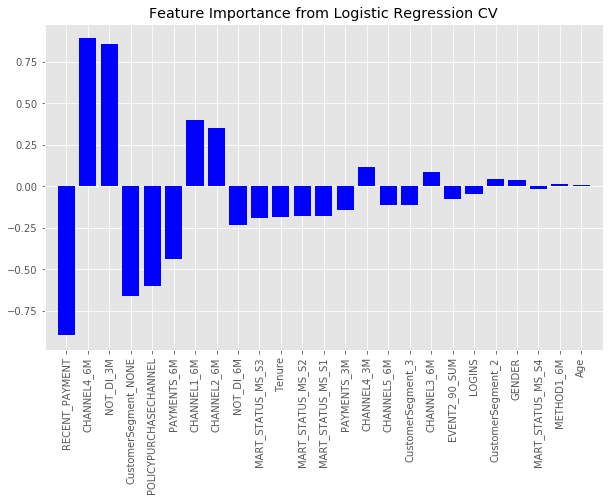

In [221]:
importances = searchCV.coef_.flatten()
indices = np.argsort(np.abs(importances))[::-1]
features = X.columns.values
#print the feature ranking
for f in range(X.shape[1]):
    print("%d. feature %s (%f)" %(f + 1, features[indices[f]], importances[indices[f]]))
# plot the feature importances of the forest
plt.figure()
plt.title("Feature Importance from Logistic Regression CV")
plt.bar(range(X.shape[1]), importances[indices],
             color = 'b', align = 'center')

plt.xticks(range(X.shape[1]), features[indices], rotation = 'vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

    

## Random Forest Classifier

In [223]:
parameters = {'n_estimators':(10,15,20,50,100),
              'criterion':('gini','entropy'),
              'min_samples_split':(2,3,4,5),
              'min_samples_leaf':(1,2,3,4)}

model = RandomForestClassifier(random_state=128, warm_start=False, class_weight='balanced')
grid_obj = GridSearchCV(model, param_grid=parameters, scoring=score, verbose=1, n_jobs=4, cv=4)
grid_obj = grid_obj.fit(X_train, y_train)
model = grid_obj.best_estimator_
print (model.get_params, sep = '\n')
print("Model has a training AUC score of %.4f"%(predict_labels(model, X_train, y_train)))
print('Model has a testing AUC score of %.4f'%(predict_labels(model, X_test, y_test)))


Fitting 4 folds for each of 160 candidates, totalling 640 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  7.6min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed: 18.1min
[Parallel(n_jobs=4)]: Done 640 out of 640 | elapsed: 26.2min finished


<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=128, verbose=0, warm_start=False)>
Model has a training AUC score of 0.9999
Model has a testing AUC score of 0.9911


In [224]:
print(classification_report(y_test, model.predict(X_test)))
print(confusion_matrix(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99     37294
          1       0.98      1.00      0.99     37294

avg / total       0.99      0.99      0.99     74588

[[36629   665]
 [    0 37294]]


1. feature Tenure (0.168953)
2. feature Age (0.164339)
3. feature CHANNEL4_6M (0.151083)
4. feature CHANNEL4_3M (0.065876)
5. feature LOGINS (0.064224)
6. feature PAYMENTS_6M (0.050984)
7. feature CHANNEL2_6M (0.050657)
8. feature PAYMENTS_3M (0.046209)
9. feature METHOD1_6M (0.037789)
10. feature CHANNEL3_6M (0.024689)
11. feature GENDER (0.020559)
12. feature CHANNEL5_6M (0.018870)
13. feature EVENT2_90_SUM (0.015938)
14. feature CustomerSegment_2 (0.014202)
15. feature MART_STATUS_MS_S2 (0.014043)
16. feature MART_STATUS_MS_S1 (0.013206)
17. feature RECENT_PAYMENT (0.012509)
18. feature CHANNEL1_6M (0.011528)
19. feature POLICYPURCHASECHANNEL (0.011341)
20. feature MART_STATUS_MS_S3 (0.009518)
21. feature NOT_DI_3M (0.008964)
22. feature MART_STATUS_MS_S4 (0.007322)
23. feature CustomerSegment_3 (0.006527)
24. feature NOT_DI_6M (0.005476)
25. feature CustomerSegment_NONE (0.005195)


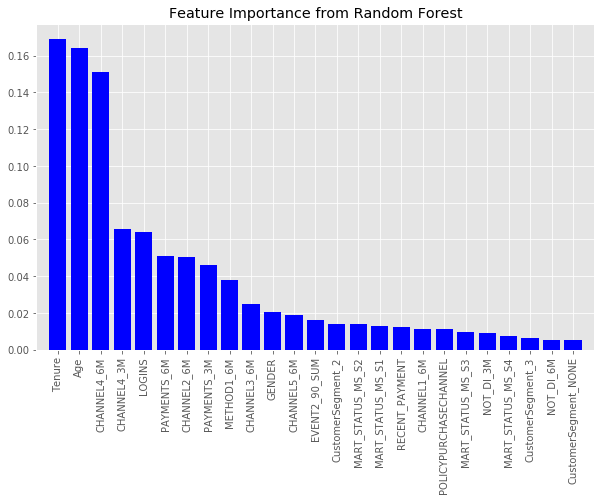

In [242]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

#print the feature ranking
for f in range(X.shape[1]):
    print("%d. feature %s (%f)"%(f + 1, features[indices[f]], importances[indices[f]]))
# plot the feature importances of the forest
plt.figure()
plt.title("Feature Importance from Random Forest")
plt.bar(range(X.shape[1]), importances[indices],
             color = 'b', align = 'center')
plt.xticks(range(X.shape[1]), features[indices], rotation = 'vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

    
    

## Gradient Boosting Classifier

In [153]:
parameters = {'loss':('deviance','exponential'),
              'learning_rate':(0.01,0.1,1.0),
              'min_samples_split':(2,3,4),
              'min_samples_leaf':(1,2,3)}

model = GradientBoostingClassifier(random_state=seed, warm_start=False)
grid_obj = GridSearchCV(model, param_grid=parameters, scoring=score, verbose=1, n_jobs=4, cv=4)
grid_obj = grid_obj.fit(X_train, y_train)
model = grid_obj.best_estimator_
print (model.get_params, sep = '\n')
print("Model has a training AUC score of %.4f"%(predict_labels(model, X_train, y_train)))
print('Model has a testing AUC score of %.4f'%(predict_labels(model, X_test, y_test)))

Fitting 4 folds for each of 54 candidates, totalling 216 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   27.9s
[Parallel(n_jobs=4)]: Done 216 out of 216 | elapsed:   30.8s finished


<bound method BaseEstimator.get_params of GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=2,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=128,
              subsample=1.0, verbose=0, warm_start=False)>
Model has a training AUC score of 0.7994
Model has a testing AUC score of 0.7817


In [154]:
print(classification_report(y_test, model.predict(X_test)))
print(confusion_matrix(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.78      0.79      0.78      1406
          1       0.79      0.77      0.78      1406

avg / total       0.78      0.78      0.78      2812

[[1113  293]
 [ 321 1085]]


# Naive Bayes Classifier

In [246]:
# Since the dataset is not large and some transformation done to convert features to normal distribution. Let's try Gaussian Naive Bayes
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha = 0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

print("Model has a training AUC score of %.4f"%(predict_labels(clf, X_train, y_train)))
print('Model has a testing AUC score of %.4f'%(predict_labels(clf, X_test, y_test)))


             precision    recall  f1-score   support

          0       0.75      0.78      0.77     37294
          1       0.77      0.74      0.76     37294

avg / total       0.76      0.76      0.76     74588

Model has a training AUC score of 0.7657
Model has a testing AUC score of 0.7624


In [234]:
# Define the splitter for splitting the data in a train set and a test set
splitter = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=0)

# Loop through the splits (only one)
for train_indices, test_indices in splitter.split(X_train, y_train):
    # Select the train and test data
    X_train_small, y_train_small = X_train.iloc[train_indices], y_train.iloc[train_indices]
    X_val, y_val = X_train.iloc[test_indices], y_train.iloc[test_indices]
    

    # Fit and predict!
    clf.fit(X_train_small, y_train_small)
    y_pred = clf.predict(X_val)
    
    # And finally: show the results
    print(classification_report(y_val, y_pred))

             precision    recall  f1-score   support

          0       0.75      0.78      0.77     26106
          1       0.77      0.74      0.76     26106

avg / total       0.76      0.76      0.76     52212

             precision    recall  f1-score   support

          0       0.76      0.78      0.77     26106
          1       0.77      0.75      0.76     26106

avg / total       0.77      0.76      0.76     52212

             precision    recall  f1-score   support

          0       0.75      0.78      0.77     26106
          1       0.77      0.75      0.76     26106

avg / total       0.76      0.76      0.76     52212



In [258]:
print(classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

          0       0.75      0.78      0.77     37294
          1       0.77      0.74      0.76     37294

avg / total       0.76      0.76      0.76     74588



# Neural network


In [253]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
# also tried different solver
nn = MLPClassifier(hidden_layer_sizes = (15,),solver = 'sgd', activation = 'logistic',
                   alpha = 0.1, learning_rate = 'adaptive')
splitter = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=0)
scaler = StandardScaler()
#X = scaler.fit_transform(train[data2use.columns.values])
#y = train['Call_Flag']

# Define the splitter for splitting the data in a train set and a test set
splitter = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=0)

# Loop through the splits (only one)
for train_indices, test_indices in splitter.split(X_upsampled, y_upsampled):
    # Select the train and test data
    X_train, y_train = X_upsampled.iloc[train_indices], y_upsampled.iloc[train_indices]
    X_test, y_test = X_upsampled.iloc[test_indices], y_upsampled.iloc[test_indices]
    
    # Normalize the data, it doesn't help much
   # X_train = normalize(X_train)
   # X_test = normalize(X_test)
    
    # Fit and predict!
    nn.fit(X_train, y_train)
    y_pred = nn.predict(X_test)
    
    # And finally: show the results
    print(classification_report(y_test, y_pred))


             precision    recall  f1-score   support

          0       0.79      0.76      0.77     37294
          1       0.77      0.80      0.78     37294

avg / total       0.78      0.78      0.78     74588

             precision    recall  f1-score   support

          0       0.79      0.77      0.78     37294
          1       0.77      0.80      0.78     37294

avg / total       0.78      0.78      0.78     74588

             precision    recall  f1-score   support

          0       0.79      0.76      0.77     37294
          1       0.77      0.80      0.78     37294

avg / total       0.78      0.78      0.78     74588



## Deep neural net
Tried couple deep net combination and the results reduces when the number of layer increase. Three layer neural net significantly reduced the model performance. Two layer neural network with set up of (20,10) works ok.

In [257]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

nn = MLPClassifier(hidden_layer_sizes = (20,10),solver = 'sgd', activation = 'logistic',
                   alpha = 0.1, learning_rate = 'adaptive')
splitter = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=0)
scaler = StandardScaler()
#X = scaler.fit_transform(train[data2use.columns.values])
#y = train['Call_Flag']

# Define the splitter for splitting the data in a train set and a test set
splitter = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=0)

# Loop through the splits (only one)
for train_indices, test_indices in splitter.split(X_upsampled, y_upsampled):
    # Select the train and test data
    X_train, y_train = X_upsampled.iloc[train_indices], y_upsampled.iloc[train_indices]
    X_test, y_test = X_upsampled.iloc[test_indices], y_upsampled.iloc[test_indices]
    
    # Normalize the data
  #  X_train = normalize(X_train)
  #  X_test = normalize(X_test)
    
    # Fit and predict!
    nn.fit(X_train, y_train)
    y_pred = nn.predict(X_test)
    
    # And finally: show the results
    print(classification_report(y_test, y_pred))


             precision    recall  f1-score   support

          0       0.79      0.76      0.78     37294
          1       0.77      0.80      0.78     37294

avg / total       0.78      0.78      0.78     74588

             precision    recall  f1-score   support

          0       0.79      0.77      0.78     37294
          1       0.78      0.79      0.79     37294

avg / total       0.78      0.78      0.78     74588

             precision    recall  f1-score   support

          0       0.79      0.77      0.78     37294
          1       0.77      0.79      0.78     37294

avg / total       0.78      0.78      0.78     74588



In [255]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

nn = MLPClassifier(hidden_layer_sizes = (20,10,2),solver = 'sgd', activation = 'logistic',
                   alpha = 0.1, learning_rate = 'adaptive')
splitter = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=0)
scaler = StandardScaler()
#X = scaler.fit_transform(train[data2use.columns.values])
#y = train['Call_Flag']

# Define the splitter for splitting the data in a train set and a test set
splitter = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=0)

# Loop through the splits (only one)
for train_indices, test_indices in splitter.split(X_upsampled, y_upsampled):
    # Select the train and test data
    X_train, y_train = X_upsampled.iloc[train_indices], y_upsampled.iloc[train_indices]
    X_test, y_test = X_upsampled.iloc[test_indices], y_upsampled.iloc[test_indices]
    
    # Normalize the data
  #  X_train = normalize(X_train)
  #  X_test = normalize(X_test)
    
    # Fit and predict!
    nn.fit(X_train, y_train)
    y_pred = nn.predict(X_test)
    
    # And finally: show the results
    print(classification_report(y_test, y_pred))


             precision    recall  f1-score   support

          0       0.79      0.76      0.78     37294
          1       0.77      0.80      0.79     37294

avg / total       0.78      0.78      0.78     74588

             precision    recall  f1-score   support

          0       0.73      0.21      0.33     37294
          1       0.54      0.92      0.68     37294

avg / total       0.63      0.57      0.50     74588

             precision    recall  f1-score   support

          0       0.68      0.35      0.46     37294
          1       0.56      0.84      0.67     37294

avg / total       0.62      0.59      0.57     74588



# Outlier detection method
* Multivariate Gaussian
* SVC
* K-nearest neighbor


In [155]:
parameters = {'n_neighbors':(5,10,15,20),
              'weights':('uniform','distance'),
              'p':(1,2)}

model = KNeighborsClassifier()
grid_obj = GridSearchCV(model, param_grid=parameters, scoring=score, verbose=1, n_jobs=4, cv=4)
grid_obj = grid_obj.fit(X_train, y_train)
model = grid_obj.best_estimator_
print (model.get_params, sep='\n')
print("Model has a training AUC score of %.4f"%(predict_labels(model, X_train, y_train)))
print('Model has a testing AUC score of %.4f'%(predict_labels(model, X_test, y_test)))

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.1s
[Parallel(n_jobs=4)]: Done  64 out of  64 | elapsed:    6.1s finished


<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=1,
           weights='uniform')>
Model has a training AUC score of 0.7861
Model has a testing AUC score of 0.7600


In [ ]:
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score
def feature_normalize(dataset):
    mu = np.mean(dataset,axis=0)
    sigma = np.std(dataset,axis=0)
    return (dataset - mu)/sigma

def estimateGaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma
    
def multivariateGaussian(dataset,mu,sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(dataset)

def selectThresholdByCV(probs,gt):
    best_epsilon = 0
    best_f1 = 0
    f = 0
    stepsize = (max(probs) - min(probs)) / 1000;
    epsilons = np.arange(min(probs),max(probs),stepsize)
    for epsilon in np.nditer(epsilons):
        predictions = (probs < epsilon)
        f = f1_score(gt, predictions, average = "binary")
        if f > best_f1:
            best_f1 = f
            best_epsilon = epsilon
    return best_f1, best_epsilon

mu, sigma = estimateGaussian(X_train)
p = multivariateGaussian(X_train,mu,sigma)

p_cv = multivariateGaussian(cv_data,mu,sigma)
fscore, ep = selectThresholdByCV(p_cv,gt_data)
outliers = np.asarray(np.where(p < ep))
